In [ ]:
!pip install -r requirements.txt

In [1]:
import pandas as pd
import numpy as np

In [2]:
np.random.seed(777)

In [3]:
df = pd.read_excel('ep1_esic2023_clareza_TRAIN.xlsx')
df.head()

,resp_text,clarity
0,Prezado Sr Jose Taunai Em atenção ao seu pe...,c5
1,"""A pedido do Pró-Reitor de Graduação, informa...",c5
2,"""Prezado (a) Sr. (a), Agradecemos o contato e...",c234
3,"""Prezado (a) Sr. (a), Agradecemos o contato e...",c234
4,"""Prezado Prof. Gilberto Tadeu Reis da Silva ...",c234


In [4]:
df.describe()

,resp_text,clarity
count,6000,6000
unique,5626,3
top,"Prezado(a) Senhor(a), Sua manifestação foi a...",c5
freq,41,2000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resp_text  6000 non-null   object
 1   clarity    6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


## Pré-processamento

### 0. Reordenar baseado no rótulo 'clarity' (opcional)

In [6]:
df.sort_values(by='clarity', ascending=True, inplace=True, ignore_index=True)
df.head()

,resp_text,clarity
0,"Prezada Senhora, Informa-se que o DNIT é uma ...",c1
1,"Prezada, Os dados se referem somente aos na...",c1
2,"Prezado Usuário, Inicialmente agradecemos o s...",c1
3,"Prezada, Referimo-nos a sua demanda, regist...",c1
4,"Prezada, Segue anexa a resposta da área com...",c1


### 1. Remover linhas vazias ou nulas, se existirem

In [7]:
df['resp_text'].dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resp_text  6000 non-null   object
 1   clarity    6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


não tinhamos nenhuma linha vazia ou nula

### 2. Mudar todas as letras para caixa baixa

In [9]:
df['resp_text'] = [resp.lower() for resp in df['resp_text']]
df.sample()

,resp_text,clarity
2240,"prezado senhor, em atenção a solicitação ...",c234


### 3. Tokenização

In [10]:
from nltk.tokenize import word_tokenize

In [11]:
df_tokenized = df
df_tokenized['tokens'] = [word_tokenize(resp) for resp in df['resp_text']]

In [12]:
df_tokenized.head(10)

,resp_text,clarity,tokens
0,"prezada senhora, informa-se que o dnit é uma ...",c1,"[prezada, senhora, ,, informa-se, que, o, dnit..."
1,"prezada, os dados se referem somente aos na...",c1,"[prezada, ,, os, dados, se, referem, somente, ..."
2,"prezado usuário, inicialmente agradecemos o s...",c1,"[prezado, usuário, ,, inicialmente, agradecemo..."
3,"prezada, referimo-nos a sua demanda, regist...",c1,"[prezada, ,, referimo-nos, a, sua, demanda, ,,..."
4,"prezada, segue anexa a resposta da área com...",c1,"[prezada, ,, segue, anexa, a, resposta, da, ár..."
5,"prezada, segue anexa a resposta da área com...",c1,"[prezada, ,, segue, anexa, a, resposta, da, ár..."
6,"prezada, segue em anexo resposta da área té...",c1,"[prezada, ,, segue, em, anexo, resposta, da, á..."
7,"prezado usuário, segue anexa resposta do seto...",c1,"[prezado, usuário, ,, segue, anexa, resposta, ..."
8,"prezada, segue resposta ao seu pedido de in...",c1,"[prezada, ,, segue, resposta, ao, seu, pedido,..."
9,"prezado usuário, enviamos a resposta apresent...",c1,"[prezado, usuário, ,, enviamos, a, resposta, a..."


### 4. Lemmatização

In [13]:
import spacy
import os

try:
    nlp = spacy.load("pt_core_news_sm")
except Exception:
    os.system("python -m spacy download pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")

In [14]:
df_lemma = df
filtered = []
for sent in df['resp_text']:
    sent = str(sent)
    doc = nlp(sent)
    temp = [token.lemma_ for token in doc if not token.is_punct]
    temp = " ".join(temp)
    filtered.append(temp)

In [15]:
df_lemma['lemma'] = filtered

In [16]:
df_lemma.head()

,resp_text,clarity,tokens,lemma
0,"prezada senhora, informa-se que o dnit é uma ...",c1,"[prezada, senhora, ,, informa-se, que, o, dnit...",prezar senhora informar se que o dnit ser um...
1,"prezada, os dados se referem somente aos na...",c1,"[prezada, ,, os, dados, se, referem, somente, ...",prezar o dado se referir somente a o nasc...
2,"prezado usuário, inicialmente agradecemos o s...",c1,"[prezado, usuário, ,, inicialmente, agradecemo...",prezar usuário inicialmente agradecer o seu ...
3,"prezada, referimo-nos a sua demanda, regist...",c1,"[prezada, ,, referimo-nos, a, sua, demanda, ,,...",prezar referimo-nos o seu demanda registr...
4,"prezada, segue anexa a resposta da área com...",c1,"[prezada, ,, segue, anexa, a, resposta, da, ár...",prezar seguir anexo o resposta de o área ...


## Separação de treino e teste

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
main = df_lemma

X = main[['lemma']]
y = main[['clarity']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=main['clarity'])

<Axes: ylabel='clarity'>

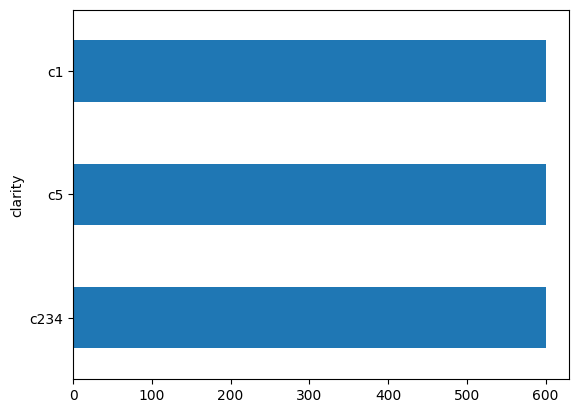

In [19]:
y_test['clarity'].value_counts().plot(kind='barh')


### Enconding do rótulo

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
import warnings

warnings.filterwarnings("ignore")

Encoder = LabelEncoder()

y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

## Vetorização de palavras

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(main['lemma'])

X_train_Tfidf = Tfidf_vect.transform(X_train['lemma'])
X_test_Tfidf = Tfidf_vect.transform(X_test['lemma'])

In [45]:
Tfidf_vect.vocabulary_

{'prezar': 3773,
 'senhora': 4346,
 'informar': 2731,
 'se': 4299,
 'que': 3932,
 'dnit': 1835,
 'ser': 4354,
 'um': 4799,
 'autarquia': 839,
 'publico': 3905,
 'federal': 2272,
 'todo': 4668,
 'processo': 3801,
 'de': 1591,
 'cunho': 1542,
 'administrativo': 505,
 'ou': 3455,
 'disciplinar': 1790,
 'dizer': 1832,
 'respeito': 4152,
 'apenas': 688,
 'servidor': 4361,
 'órgão': 4994,
 'parte': 3508,
 'envolver': 2035,
 'por': 3665,
 'ter': 4631,
 'acesso': 458,
 'mesmo': 3158,
 'em': 1946,
 'consulta': 1374,
 'sistema': 4434,
 'pessoal': 3607,
 'não': 3348,
 'localizar': 3008,
 'nome': 3307,
 'pessoa': 3605,
 'indicar': 2695,
 'como': 1221,
 'judicial': 2888,
 'dever': 1734,
 'solicitar': 4471,
 'devir': 1737,
 'atenciosamente': 787,
 'mary': 3089,
 'rose': 4231,
 'oliveira': 3400,
 'sic': 4394,
 'dado': 1569,
 'referir': 4034,
 'somente': 4479,
 'nascido': 3278,
 'vivo': 4933,
 'momento': 3210,
 'nascimento': 3279,
 'identificar': 2579,
 'com': 1203,
 'microcefalia': 3170,
 'grande': 2

In [46]:
print(X_train_Tfidf)

  (0, 4802)	0.123410286353006
  (0, 4668)	0.058903175760038104
  (0, 4595)	0.08243175628865279
  (0, 4377)	0.08629755679407346
  (0, 4375)	0.06823414310041188
  (0, 4354)	0.02551457960158116
  (0, 4345)	0.03332005078130969
  (0, 4318)	0.1168161305614126
  (0, 4162)	0.03629261446572596
  (0, 4154)	0.0806479775918747
  (0, 4092)	0.08003817203266904
  (0, 4065)	0.09029306170505814
  (0, 4015)	0.03914908211111041
  (0, 3932)	0.12111333352533314
  (0, 3805)	0.10206680307076554
  (0, 3773)	0.02710549139814676
  (0, 3713)	0.038765806154363654
  (0, 3665)	0.054009035759343606
  (0, 3650)	0.035045175355371695
  (0, 3552)	0.07052067350922857
  (0, 3551)	0.07429959951060766
  (0, 3494)	0.11385393021757849
  (0, 3464)	0.11152594997454447
  (0, 3428)	0.13130728053672552
  (0, 3357)	0.0808034904817843
  :	:
  (4199, 941)	0.06026858793492802
  (4199, 940)	0.05960838453279988
  (4199, 894)	0.07130919387256787
  (4199, 844)	0.07368435030004197
  (4199, 810)	0.03803026201858695
  (4199, 793)	0.046662295

### Naive Bayes

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
from sklearn import naive_bayes

Naive = naive_bayes.MultinomialNB()

scores = cross_val_score(Naive, X_train_Tfidf, y_train, cv=5)

print(scores)
scores.mean()

[0.52738095 0.53214286 0.5452381  0.55595238 0.53690476]


0.5395238095238095

mto ruim eu acho

### SVM

In [60]:
from sklearn import svm

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

scores = cross_val_score(SVM, X_train_Tfidf, y_train, cv=5)

print(scores)
scores.mean()

[0.54404762 0.53809524 0.59047619 0.59047619 0.56904762]


0.5664285714285715

não tão mlr assim, ctz que tem algo errado

### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
scores = cross_val_score(RF, X_train_Tfidf, y_train, cv=5)

print(scores)
scores.mean()


[0.55357143 0.53571429 0.56309524 0.57738095 0.5702381 ]


0.5599999999999999

meio fezes tbm

## Relação entre tamanho do texto e claridade

In [62]:
text_size = df['resp_text'].str.len()
df['text_size'] = text_size
df['clarity_new'] = df['clarity'].replace(['c1', 'c234', 'c5'], [0,1,2])
df['clarity_new'] = df['clarity_new'].astype('int64')
df['clarity_new'].corr(df['text_size'])

-0.10332829414456454

legal, n tem correlaçãokkkkk

In [63]:
df = df[['resp_text', 'clarity']]